# Import Library

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import itertools
from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import accuracy_score
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
print(os.listdir("./"))

['.ipynb_checkpoints', '20172800CNN.py', 'BIL4112-Final-2022.pdf', 'fashion-mnist_test.csv', 'fashion-mnist_train.csv', 'Untitled.ipynb']


# Read Train

In [3]:
traindf = pd.read_csv("./fashion-mnist_train.csv")
print(traindf.shape)
traindf.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Read Test

In [4]:
testdf= pd.read_csv("./fashion-mnist_test.csv")
print(testdf.shape)
testdf.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Split for test and train to X,Y

In [6]:
Y_train = traindf["label"]
X_train = traindf.drop(labels = ["label"],axis = 1)
Y_test = testdf["label"]
X_test = testdf.drop(labels = ["label"],axis = 1)

In [7]:
Y_train.value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

In [8]:
Y_test.value_counts()

0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: label, dtype: int64

# Check Random Row

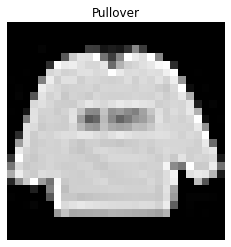

In [9]:
img = X_train.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(class_names[Y_train.iloc[0]])
plt.axis("off")
plt.show()

# Normalization

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape process to model

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

# Encode Categorical Y    X[0]=1--->X[0]=[0,1,0,0,0,0,0,0,0,0]

In [12]:
Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

# Split from train set to validate set

In [13]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)

# Creating model

In [14]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [15]:
model.compile(optimizer = "Adam" , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
epochs = 75 
batch_size = 250

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=5,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False) 

datagen.fit(X_train)

# Fit Model

In [18]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/75
216/216 [==============================] - 40s 182ms/step - loss: 1.0252 - accuracy: 0.6148 - val_loss: 0.6072 - val_accuracy: 0.7612
Epoch 2/75
216/216 [==============================] - 41s 190ms/step - loss: 0.7296 - accuracy: 0.7207 - val_loss: 0.5537 - val_accuracy: 0.7727
Epoch 3/75
216/216 [==============================] - 45s 206ms/step - loss: 0.6592 - accuracy: 0.7472 - val_loss: 0.4930 - val_accuracy: 0.8048
Epoch 4/75
216/216 [==============================] - 43s 198ms/step - loss: 0.6253 - accuracy: 0.7622 - val_loss: 0.4584 - val_accuracy: 0.8263
Epoch 5/75
216/216 [==============================] - 58s 266ms/step - loss: 0.6045 - accuracy: 0.7674 - val_loss: 0.4396 - val_accuracy: 0.8317
Epoch 6/75
216/216 [==============================] - 63s 290ms/step - loss: 0.5808 - accuracy: 0.7773 - val_loss: 0.4188 - val_accuracy: 0.8387
Epoch 7/75
216/216 [==============================] - 47s 217ms/step - loss: 0.5635 - accuracy: 0.7853 - val_loss: 0.4102 - val_ac

216/216 [==============================] - 38s 177ms/step - loss: 0.3896 - accuracy: 0.8539 - val_loss: 0.2933 - val_accuracy: 0.8905
Epoch 58/75
216/216 [==============================] - 39s 178ms/step - loss: 0.3872 - accuracy: 0.8533 - val_loss: 0.2730 - val_accuracy: 0.9008
Epoch 59/75
216/216 [==============================] - 39s 179ms/step - loss: 0.3948 - accuracy: 0.8527 - val_loss: 0.2766 - val_accuracy: 0.8980
Epoch 60/75
216/216 [==============================] - 39s 179ms/step - loss: 0.3880 - accuracy: 0.8543 - val_loss: 0.2769 - val_accuracy: 0.8983
Epoch 61/75
216/216 [==============================] - 41s 189ms/step - loss: 0.3875 - accuracy: 0.8539 - val_loss: 0.2761 - val_accuracy: 0.8955
Epoch 62/75
216/216 [==============================] - 39s 180ms/step - loss: 0.3873 - accuracy: 0.8539 - val_loss: 0.2774 - val_accuracy: 0.8957
Epoch 63/75
216/216 [==============================] - 39s 179ms/step - loss: 0.3867 - accuracy: 0.8542 - val_loss: 0.2706 - val_accurac

# Check History loss for overfitting

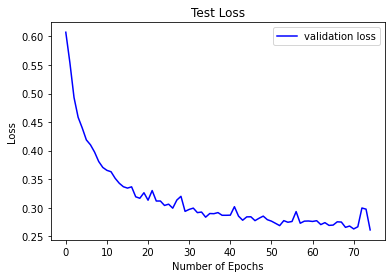

In [19]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Train Results

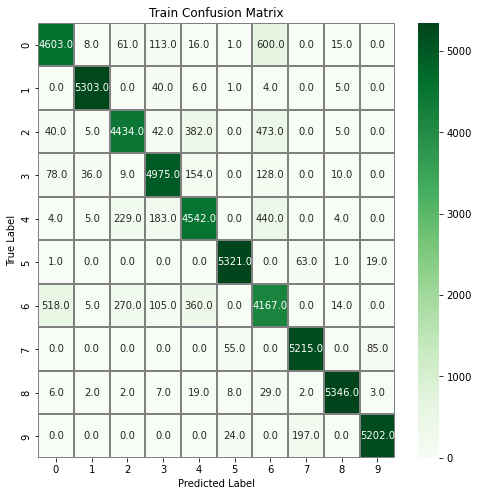

In [58]:
Y_pred = model.predict(X_train)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_train,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Train Confusion Matrix")
plt.show()

In [59]:
accuracy_score(Y_true, Y_pred_classes)

0.9094074074074074

In [60]:
np.max(confusion_mtx,axis=0)/np.sum(confusion_mtx,axis=0)

array([0.8767619 , 0.98862789, 0.88591409, 0.91033852, 0.82898339,
       0.98354898, 0.71340524, 0.95216359, 0.99      , 0.97984555])

# Validation Results

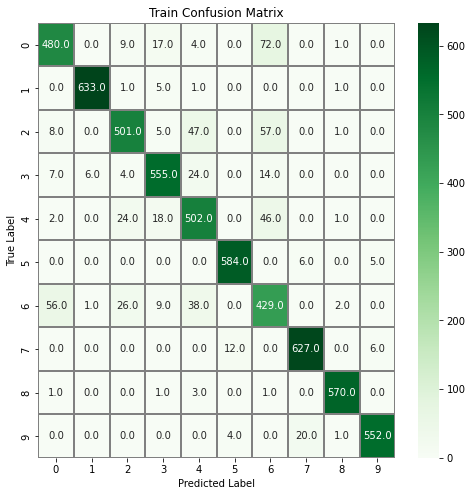

In [61]:
Y_pred = model.predict(X_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_val,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Train Confusion Matrix")
plt.show()

In [62]:
accuracy_score(Y_true, Y_pred_classes)

0.9055

In [63]:
np.max(confusion_mtx,axis=0)/np.sum(confusion_mtx,axis=0)

array([0.86642599, 0.9890625 , 0.88672566, 0.90983607, 0.81098546,
       0.97333333, 0.69305331, 0.96018377, 0.98786828, 0.98046181])

# Test Result

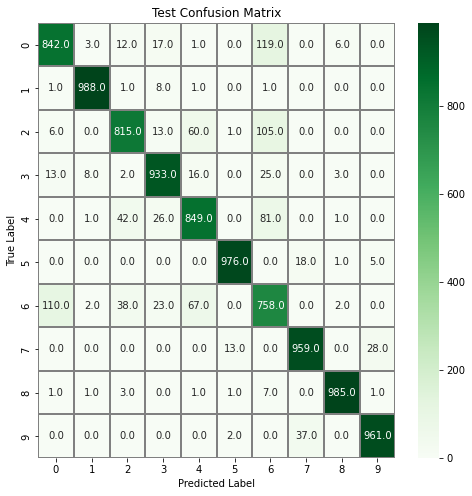

In [64]:
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(Y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Test Confusion Matrix")
plt.show()

In [65]:
accuracy_score(Y_true, Y_pred_classes)

0.9066

In [66]:
np.max(confusion_mtx,axis=0)/np.sum(confusion_mtx,axis=0)

array([0.86536485, 0.98504487, 0.89266156, 0.91470588, 0.85326633,
       0.98288016, 0.69160584, 0.94575937, 0.98697395, 0.96582915])